## What should be presented in the case study:

#### 1. Degree (strength) distribution


#### 2. Two of the following characteristics:

    2.1 Average path length

    2.2 Clustering coefficient

    2.3 Small-worldness


 #### 3. At least one of centrality measures: 

    3.1 Degree centrality￼

    3.2 Closeness centrality￼

    3.3 Betweenness

    3.4 Prestige

    3.5 Decay centrality

#### 4. You need to consider at least 2 networks

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Data loading

In [7]:
path = "./data/"
fileName2019 = "EU_routes_2019.csv.gz"
fileName2022 = "EU_routes_2022.csv.gz"
fileAirports = "airports_clean.csv"
routes2019 = pd.read_csv(path + fileName2019)
routes2022 = pd.read_csv(path + fileName2022)
airports = pd.read_csv(path+fileAirports)

# Data exploration

In [8]:
# Number of unique origin_IATA_IATAs
routes2019.origin_IATA.nunique()

462

In [9]:
#number of unique destination_IATAs
routes2022.origin_IATA.nunique()

584

In [11]:
routes2022.head()

,origin_IATA,destination_IATA,weight,rec_aircrafts,rec_days,origin_airport_name,origin_city,origin_country,origin_ICAO,origin_latitude,origin_longitude,origin_continent,destination_airport_name,destination_city,destination_country,destination_ICAO,destination_latitude,destination_longitude,destination_continent
0,AAH,AGB,1,1,1,Aachen-Merzbrück Airport,Aachen,Germany,EDKA,50.823055,6.186389,EU,Augsburg Airport,Augsburg,Germany,EDMA,48.425278,10.931667,EU
1,AAH,ALL,1,1,1,Aachen-Merzbrück Airport,Aachen,Germany,EDKA,50.823055,6.186389,EU,Villanova D'Albenga International Airport,Albenga,Italy,LIMG,44.050600,8.127430,EU
2,AAH,BFE,1,1,1,Aachen-Merzbrück Airport,Aachen,Germany,EDKA,50.823055,6.186389,EU,Bielefeld Airport,Bielefeld,Germany,EDLI,51.964720,8.544444,EU
3,AAH,BNJ,4,4,6,Aachen-Merzbrück Airport,Aachen,Germany,EDKA,50.823055,6.186389,EU,Bonn-Hangelar Airport,Sankt-Augustin,Germany,EDKB,50.768890,7.163333,EU
4,AAH,BWE,1,1,1,Aachen-Merzbrück Airport,Aachen,Germany,EDKA,50.823055,6.186389,EU,Braunschweig-Wolfsburg Airport,Braunschweig,Germany,EDVE,52.319200,10.556100,EU


In [12]:
#calculate the sum of NA values in each column
routes2022.isna().sum()

origin_IATA                 0
destination_IATA            0
weight                      0
rec_aircrafts               0
rec_days                    0
origin_airport_name         0
origin_city                 0
origin_country              0
origin_ICAO                 0
origin_latitude             0
origin_longitude            0
origin_continent            0
destination_airport_name    0
destination_city            0
destination_country         0
destination_ICAO            0
destination_latitude        0
destination_longitude       0
destination_continent       0
dtype: int64

# Basic Network Metrics and Plots

In [15]:
#create directed and undirected network object 
G2019_directed=nx.from_pandas_edgelist(routes2019, source = 'origin_IATA', target = 'destination_IATA', edge_attr= 'weight', create_using=nx.DiGraph())
G2022_undirected = nx.from_pandas_edgelist(routes2022, source = "origin_IATA", target = "destination_IATA", edge_attr= 'weight', create_using=nx.Graph())
G2022_directed=nx.from_pandas_edgelist(routes2022, source = 'origin_IATA', target = 'destination_IATA', edge_attr= 'weight', create_using=nx.DiGraph())
G2022_undirected = nx.from_pandas_edgelist(routes2022, source = "origin_IATA", target = "destination_IATA", edge_attr= 'weight', create_using=nx.Graph())

In [16]:
#Produce adjecancy matrices for 2022 and 2022 for the directed network
adj2019 = nx.to_pandas_adjacency(G2019_directed, dtype = int)
adj2022 = nx.to_pandas_adjacency(G2022_directed, dtype = int)
adj2019.head()

,AAH,DRS,DUS,FMO,MGL,AAL,AAR,AGP,AMS,BCN,...,SKE,VLL,SWS,TAY,WBG,UDJ,TRF,AGE,YEO,KOQ
AAH,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DRS,1,0,6,2,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
DUS,1,5,0,3,4,1,0,5,7,3,...,0,0,0,0,0,0,0,0,0,0
FMO,0,1,2,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MGL,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


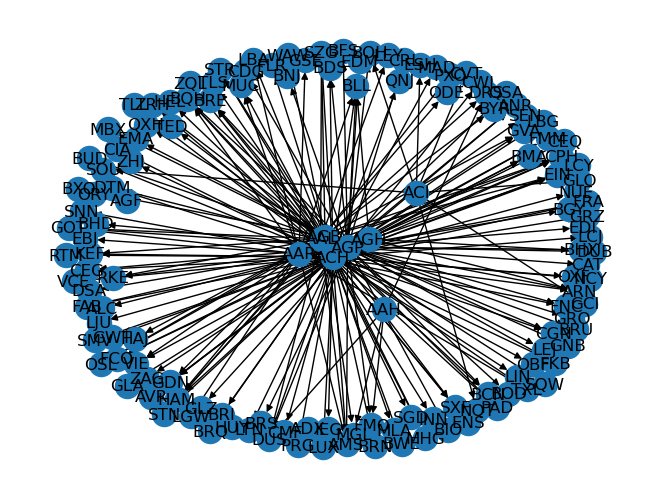

In [52]:
#draw a sample of the first 100 routes (Airports are Sorted by Origin, thus the central shape of some)
G_sample = nx.from_pandas_edgelist(routes2019[0:200], source = 'origin_IATA', target = 'destination_IATA', create_using=nx.DiGraph())
nx.draw(G_sample, with_labels = True)

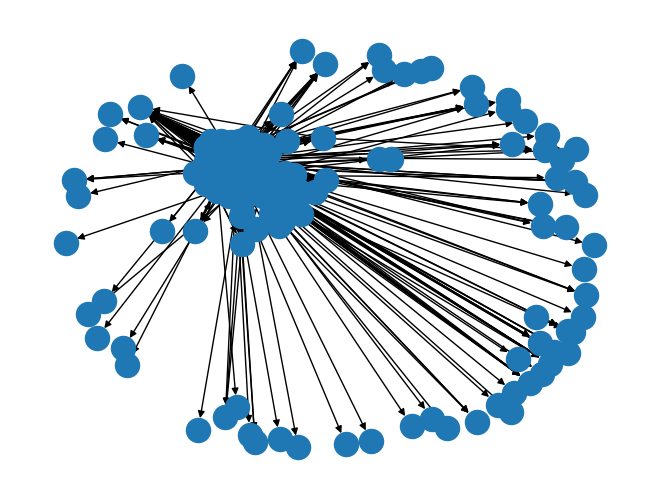

In [53]:
nx.draw(G2022_directed)

## Degree

In [19]:
#caluculate in degrees 
in_degree2019 = dict(G2019_directed.in_degree)

In [20]:
#out degree
out_degree2019 = dict(G2019_directed.out_degree)

In [14]:
#calculate in-degree for each node using adjacency matrix (sum over rows)
#np.sum(adj2019, axis=0)
#np.sum(adj2022, axis = 1)

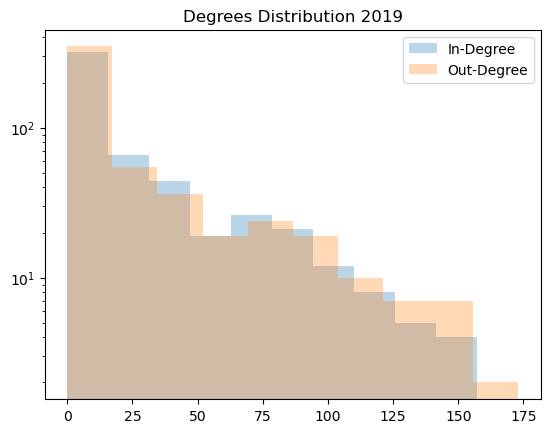

In [21]:
plt.hist(in_degree2019.values(),  alpha=0.3, log = True, label = 'In-Degree')
plt.hist(out_degree2019.values(),  alpha=0.3, log = True, label = 'Out-Degree')
plt.title('Degrees Distribution 2019')
plt.legend()

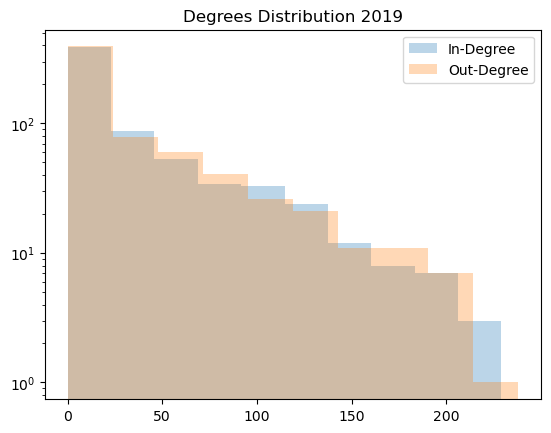

In [22]:
#caluculate in degrees 
in_degree2022 = dict(G2022_directed.in_degree)
out_degree2022 = dict(G2022_directed.out_degree)

plt.hist(in_degree2022.values(),  alpha=0.3, log = True, label = 'In-Degree')
plt.hist(out_degree2022.values(),  alpha=0.3, log = True, label = 'Out-Degree')
plt.title('Degrees Distribution 2019')
plt.legend()

## Strength

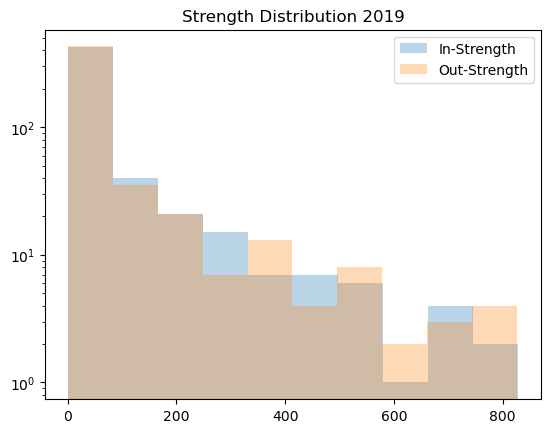

In [23]:
#strength distribution
in_strength2019 = dict(G2019_directed.in_degree(weight = 'weight'))
out_strength2019 = dict(G2019_directed.out_degree(weight = 'weight'))

plt.hist(in_strength2019.values(), bins = 10, alpha=0.3, log = True, label = 'In-Strength')
plt.hist(out_strength2019.values(), bins = 10, alpha=0.3, log = True, label = 'Out-Strength')
plt.title('Strength Distribution 2019')
plt.legend()


In [24]:
max_strength = max(out_strength2019, key=out_strength2019.get)
print(f"Max Out-Strength is at {max_strength} with {out_strength2019[max_strength]}.")

Max Out-Strength is at MUC with 827.


In [38]:
max_strength = max(in_strength2019, key=in_strength2019.get)
print(f"Max In-Strength is at {max_strength} with {in_strength2019[max_strength]}.")

Max In-Strength is at MUC with 829.


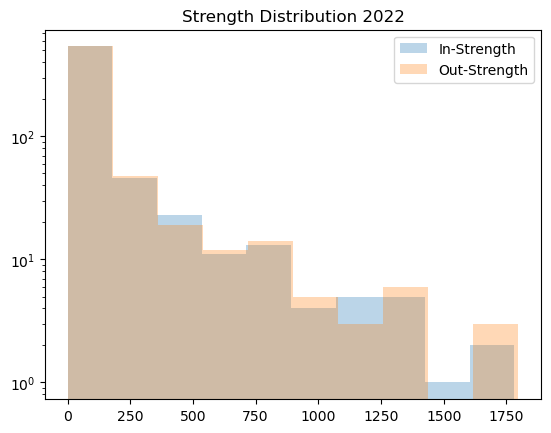

In [26]:
#strength distribution
in_strength2022 = dict(G2022_directed.in_degree(weight = 'weight'))
out_strength2022 = dict(G2022_directed.out_degree(weight = 'weight'))

plt.hist(in_strength2022.values(), bins = 10, alpha=0.3, log = True, label = 'In-Strength')
plt.hist(out_strength2022.values(), bins = 10, alpha=0.3, log = True, label = 'Out-Strength')
plt.title('Strength Distribution 2022')
plt.legend()


In [35]:
max_strength = max(out_strength2022, key=out_strength2022.get)
print(f"Max Out-Strength is at {max_strength} with {out_strength2022[max_strength]}.")

Max Out-Strength is at PMI with 1798.


In [37]:
max_strength = max(in_strength2022, key=in_strength2022.get)
print(f"Max In-Strength is at {max_strength} with {in_strength2022[max_strength]}.")

Max In-Strength is at PMI with 1781.


## Distance measures

In [39]:
from networkx.algorithms.distance_measures import diameter
from networkx import average_shortest_path_length

In [40]:
# Returns the biggest giant strongly connected component in the network
G2019_directed_connected = G2019_directed.subgraph(sorted(nx.strongly_connected_components(G2019_directed), key = len, reverse = True)[0])

In [42]:
G2019_directed_connected.number_of_nodes()

445

In [ ]:
#Calculate the diameter (takes very long for entire dataset)
diameter(G2019_directed_connected)

In [ ]:
#Calculate the diameter (takes very long for entire dataset)
average_shortest_path_length(G2019_directed_connected)

## Centrality

In [55]:
# calculate degree centrality (how connected the node is)
deg_centrality = nx.centrality.degree_centrality(G2019_directed)
sorted(deg_centrality.items(), key = lambda x: x[1], reverse = True)

[('STN', 0.6273764258555133),
 ('ZRH', 0.5779467680608364),
 ('AMS', 0.5722433460076045),
 ('LTN', 0.564638783269962),
 ('MUC', 0.5627376425855514),
 ('LBG', 0.5361216730038023),
 ('GVA', 0.532319391634981),
 ('MAD', 0.5133079847908745),
 ('FRA', 0.5095057034220533),
 ('SXF', 0.4790874524714829),
 ('DUS', 0.4714828897338403),
 ('VIE', 0.46577946768060835),
 ('CGN', 0.4505703422053232),
 ('MAN', 0.4467680608365019),
 ('LGW', 0.435361216730038),
 ('BCN', 0.42775665399239543),
 ('STR', 0.42775665399239543),
 ('CPH', 0.4220532319391635),
 ('PRG', 0.42015209125475284),
 ('CDG', 0.42015209125475284),
 ('DUB', 0.4144486692015209),
 ('AGP', 0.41254752851711024),
 ('FAB', 0.3992395437262357),
 ('BUD', 0.3916349809885932),
 ('MXP', 0.3897338403041825),
 ('HAM', 0.3840304182509506),
 ('WAW', 0.3840304182509506),
 ('EDI', 0.3821292775665399),
 ('BQH', 0.3688212927756654),
 ('SZG', 0.3650190114068441),
 ('LIS', 0.3650190114068441),
 ('BGY', 0.3593155893536122),
 ('LIN', 0.3574144486692015),
 ('ARN'

In [50]:
deg_centrality["VIE"]

0.46577946768060835

In [ ]:
# Calculating betweenness centrality (how important the node is in terms of connecting other nodes)
nx.centrality.betweenness_centrality(G2019_directed)

In [ ]:
# Calculating closeness centrality (how easily a node can reach other nodes)
nx.centrality.closeness_centrality(G2019_directed)